In [195]:
import matplotlib.pyplot
import numpy as np
import csv
import os

# описание путей
path = "C:\\Users\\andmo\\OneDrive\\Desktop\\task_tuesday\\train-set"
name_file = "train-set.csv"

# меняет текущую директорию
os.chdir(path)

# открытие файла
file_open = open(name_file, "r", encoding="utf-8")

# считываем данные из файла
data = list(csv.reader(file_open, delimiter = ","))

file_open.close()

# заполняем массив правильных ответов
goal_set = []
for i in range(len(data)):
    goal = [0, 0, 0, 0]
    if int(data[i][0]) == 1:
        goal[int(data[i][0]) - 1] = 1
    elif int(data[i][0]) == 2:
        goal[int(data[i][0]) - 1] = 1
    elif int(data[i][0]) == 3:
        goal[int(data[i][0]) - 1] = 1
    elif int(data[i][0]) == 4:
        goal[int(data[i][0]) - 1] = 1
    goal_set.append(goal)

goal_set = np.array(goal_set)

In [196]:
# количество проходов по учебному набору
iteration = 137

# коэф. обучения
alpha = 0.006

# инициация размера массива
num_pixels = 900

# инициация размера выхода
num_output = 4

# объявление весов
weight_0_1 = 0.2*np.random.random((num_pixels, num_output)) - 0.1

for j in range(iteration):
    error = 0
    for i in range(len(data)):
        # получение входных значений для первого слоя
        layer_0 = np.array(data[i][1:])
        layer_0 = layer_0.astype(float)
        
        # прямое распространение 
        layer_1 = np.dot(layer_0, weight_0_1)
        
        # ошибка
        error += np.sum((layer_1 - goal_set[i]) ** 2)
        
        # обратное распространение
        layer_1_delta = (goal_set[i] - layer_1)
        weight_0_1 += alpha * layer_0.reshape(-1,1) * layer_1_delta
    print(f'I:{j} Error:{error}')


I:0 Error:56.96543993905446
I:1 Error:30.578082611597463
I:2 Error:22.302770588985915
I:3 Error:17.846574210297298
I:4 Error:14.916281263811934
I:5 Error:12.818375956648788
I:6 Error:11.228829117453135
I:7 Error:9.975215047817626
I:8 Error:8.95712004148621
I:9 Error:8.111497482186603
I:10 Error:7.396332572854694
I:11 Error:6.7823559042667405
I:12 Error:6.248508177211598
I:13 Error:5.779268012591347
I:14 Error:5.3629741308545835
I:15 Error:4.990719060024778
I:16 Error:4.655593994635561
I:17 Error:4.352161075254717
I:18 Error:4.07607857949265
I:19 Error:3.823831517199204
I:20 Error:3.592536062774919
I:21 Error:3.379796271043008
I:22 Error:3.183598109377747
I:23 Error:3.0022303046891796
I:24 Error:2.834224588659897
I:25 Error:2.6783100781385087
I:26 Error:2.5333780398253656
I:27 Error:2.398454353896533
I:28 Error:2.2726777437221704
I:29 Error:2.1552823714706526
I:30 Error:2.045583777409911
I:31 Error:1.9429674099583447
I:32 Error:1.8468791862012133
I:33 Error:1.7568176612827204
I:34 Error

In [197]:
# проверка эффективности нейронной сети
eff = []

# описание путей
path = "C:\\Users\\andmo\\OneDrive\\Desktop\\task_tuesday\\test-set"
name_file = "test-set.csv"

# меняет текущую директорию
os.chdir(path)

# открытие файла
file_open = open(name_file, "r", encoding="utf-8")

# считываем данные из файла
data = list(csv.reader(file_open, delimiter = ","))

file_open.close()

for i in range(len(data)):
        # получение входных значений для первого слоя
        layer_0 = np.array(data[i][1:])
        layer_0 = layer_0.astype(float)
        
        # прямое распространение 
        layer_1 = np.dot(layer_0, weight_0_1)
        
        # индекс ассоциируется с типом угла
        ind = list(layer_1).index(max(layer_1))
        
        if int(ind) == int(data[i][0]) - 1:
            eff.append(1)
        else:
            eff.append(0)
        
print(f'Итоговая эффективность на тестовом наборе: {eff.count(1) / len(eff) * 100 } %')
#=print(eff)

Итоговая эффективность на тестовом наборе: 62.5 %


развернутый угол


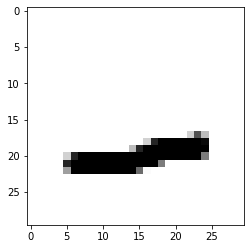

In [198]:
# описание путей
#path = "C:\\Users\\andmo\\OneDrive\\Desktop\\task_tuesday\\work-set"
#name_file = "work-set.csv"
path = "C:\\Users\\andmo\\OneDrive\\Desktop\\task_tuesday\\test-set"
name_file = "test-set.csv"

# меняет текущую директорию
os.chdir(path)

# открытие файла
file_open = open(name_file, "r", encoding="utf-8")

# считываем данные из файла
data = list(csv.reader(file_open, delimiter = ","))

file_open.close()

# загрузка пикселей из первой строки
layer_0 = np.array(data[5][1:])
layer_0 = layer_0.astype(float)

# получим из одномерного массива изображение угла
data = np.asfarray(data[5][1:]).reshape((30,30))
matplotlib.pyplot.imshow(data, cmap='Greys', interpolation='None')
        
# прямое распространение 
layer_1 = np.dot(layer_0, weight_0_1)
        
# индекс ассоциируется с типом угла
ind = list(layer_1).index(max(layer_1))
if ind == 0:
    print('развернутый угол')
elif ind == 1:
    print('прямой угол')
elif ind == 2:
    print('острый угол')
elif ind == 3:
    print('тупой угол')
